In [1]:
library(progeny)
library(dorothea)
library(tibble)
library(tidyr)
library(dplyr)
library(ggplot2)
library(pheatmap)
library(readr)

## For the volcano plot (related to support functions)
library(ggrepel)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## We also load the support functions
source("support_functions.R")

In [3]:
## We read the normalised counts and the experimental design 
Normalised_counts <- read_csv("~/Desktop/progeny/xioxong/DESEQ2.EC_AA.versus.EC_AB/post_TMM.csv")


New names:
• `` -> `...1`
Rows: 12512 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ...1
dbl (12): doxN.cd10_REP1, doxN.cd10_REP2, doxN.cd10_REP3, doxN.pdgfrb_REP1, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(Normalised_counts)

...1,doxN.cd10_REP1,doxN.cd10_REP2,doxN.cd10_REP3,doxN.pdgfrb_REP1,doxN.pdgfrb_REP2,doxN.pdgfrb_REP3,doxP.cd10_REP1,doxP.cd10_REP2,doxP.cd10_REP3,doxP.pdgfrb_REP1,doxP.pdgfrb_REP2,doxP.pdgfrb_REP3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,28.708288,32.213769,34.954429,24.665659,28.024162,26.544589,23.641540,22.058768,22.086581,32.29172,30.48402,32.909127
DPM1,26.804559,23.673412,26.074239,26.416579,27.732795,27.633556,31.793756,34.538864,30.816671,28.62896,26.70625,27.896737
SCYL3,7.759339,7.412051,8.325562,9.837868,10.475775,9.583874,8.230672,10.622032,9.322888,10.18617,11.64172,9.901267
C1orf112,3.688795,2.701574,3.146896,3.598826,3.324389,2.821845,22.243195,21.055154,20.809902,20.61056,15.28891,17.131258
CFH,54.466447,50.568125,52.374090,215.253442,215.081302,232.332202,1.203428,0.755165,1.086227,55.87155,49.29487,45.881420
FUCA2,122.985733,123.590596,122.425720,77.630063,78.370782,82.964977,130.956855,134.256380,146.273540,87.47782,91.43123,87.466432


In [5]:
df2 <- Normalised_counts[,-c(5,6,7,11,12,13)]

In [6]:
df2

...1,doxN.cd10_REP1,doxN.cd10_REP2,doxN.cd10_REP3,doxP.cd10_REP1,doxP.cd10_REP2,doxP.cd10_REP3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,28.708288,32.213769,34.954429,23.641540,22.0587681,22.086581
DPM1,26.804559,23.673412,26.074239,31.793756,34.5388639,30.816671
SCYL3,7.759339,7.412051,8.325562,8.230672,10.6220321,9.322888
C1orf112,3.688795,2.701574,3.146896,22.243195,21.0551538,20.809902
CFH,54.466447,50.568125,52.374090,1.203428,0.7551650,1.086227
FUCA2,122.985733,123.590596,122.425720,130.956855,134.2563797,146.273540
GCLC,21.839478,20.901492,20.796159,35.481564,36.7631032,33.673167
NFYA,38.738929,37.420038,40.554044,38.897864,41.6568906,40.747926
STPG1,11.758201,10.488241,11.665264,10.327548,12.0841111,11.586425


In [7]:
colnames(df2)[1] <- "gene"

In [8]:
df2

gene,doxN.cd10_REP1,doxN.cd10_REP2,doxN.cd10_REP3,doxP.cd10_REP1,doxP.cd10_REP2,doxP.cd10_REP3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,28.708288,32.213769,34.954429,23.641540,22.0587681,22.086581
DPM1,26.804559,23.673412,26.074239,31.793756,34.5388639,30.816671
SCYL3,7.759339,7.412051,8.325562,8.230672,10.6220321,9.322888
C1orf112,3.688795,2.701574,3.146896,22.243195,21.0551538,20.809902
CFH,54.466447,50.568125,52.374090,1.203428,0.7551650,1.086227
FUCA2,122.985733,123.590596,122.425720,130.956855,134.2563797,146.273540
GCLC,21.839478,20.901492,20.796159,35.481564,36.7631032,33.673167
NFYA,38.738929,37.420038,40.554044,38.897864,41.6568906,40.747926
STPG1,11.758201,10.488241,11.665264,10.327548,12.0841111,11.586425


In [9]:
df2 <- df2[, c(1,5, 6,7, 2, 3, 4)]

In [10]:
 df2


gene,doxP.cd10_REP1,doxP.cd10_REP2,doxP.cd10_REP3,doxN.cd10_REP1,doxN.cd10_REP2,doxN.cd10_REP3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,23.641540,22.0587681,22.086581,28.708288,32.213769,34.954429
DPM1,31.793756,34.5388639,30.816671,26.804559,23.673412,26.074239
SCYL3,8.230672,10.6220321,9.322888,7.759339,7.412051,8.325562
C1orf112,22.243195,21.0551538,20.809902,3.688795,2.701574,3.146896
CFH,1.203428,0.7551650,1.086227,54.466447,50.568125,52.374090
FUCA2,130.956855,134.2563797,146.273540,122.985733,123.590596,122.425720
GCLC,35.481564,36.7631032,33.673167,21.839478,20.901492,20.796159
NFYA,38.897864,41.6568906,40.747926,38.738929,37.420038,40.554044
STPG1,10.327548,12.0841111,11.586425,11.758201,10.488241,11.665264


In [11]:

Experimental_design <- read.csv("~/Desktop/progeny/xioxong/cd10/target_cd10.csv",sep = ";",row.names = NULL)

In [12]:
head(Experimental_design)

,sample,condition
,<chr>,<chr>
1,doxP_cd10_REP1,doxP_cd10
2,doxP_cd10_REP2,doxP_cd10
3,doxP_cd10_REP3,doxP_cd10
4,doxN_cd10_REP1,doxN_cd10
5,doxN_cd10_REP2,doxN_cd10
6,doxN_cd10_REP3,doxN_cd10


In [13]:
## We read the results from the differential analysis. 
ttop_KOvsWT <- read.csv("~/Desktop/progeny/xioxong/cd10/DESEQ2.doxN.cd10.versus.doxP.cd10.csv",sep = ",")

In [14]:
colnames(ttop_KOvsWT)[1] <- "ID"

In [15]:
head(ttop_KOvsWT)

,ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,index
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CXCL6,4210.06018,9.978174,0.3151527,31.661396,5.284851e-220,2.449039e-218,doxN.cd10.vs.doxP.cd10
2,ZPLD1,451.87144,9.142078,0.6549993,13.957386,2.836461e-44,1.864940e-43,doxN.cd10.vs.doxP.cd10
3,TNFAIP6,90.10315,8.662005,1.1976786,7.232328,4.747833e-13,1.250629e-12,doxN.cd10.vs.doxP.cd10
4,KCNJ16,1323.76496,8.162033,0.2470938,33.032121,2.809890e-239,1.508899e-237,doxN.cd10.vs.doxP.cd10
5,MMP7,1059.06513,7.524838,0.2075586,36.254036,8.583458e-288,6.884374e-286,doxN.cd10.vs.doxP.cd10
6,FXYD2,208.11847,7.019708,0.3684829,19.050293,6.533532e-81,7.875487e-80,doxN.cd10.vs.doxP.cd10


In [16]:
Normalised_counts_matrix <- df2 %>% 
    dplyr::mutate_if(~ any(is.na(.x)),~ if_else(is.na(.x),0,.x)) %>% 
    tibble::column_to_rownames(var = "gene") %>% 
    as.matrix()

In [17]:
ttop_KOvsWT_matrix <- ttop_KOvsWT %>% 
    dplyr::select(ID, stat) %>% 
    dplyr::filter(!is.na(t)) %>% 
    column_to_rownames(var = "ID") %>%
    as.matrix()

Warning message:
“There was 1 warning in `dplyr::filter()`.
ℹ In argument: `!is.na(t)`.
Caused by warning in `is.na()`:
! is.na() auf Nicht-(Liste oder Vektor) des Typs 'closure' angewendet”


In [18]:
## We load Dorothea Regulons
data(dorothea_hs, package = "dorothea")
regulons <- dorothea_hs %>%
  dplyr::filter(confidence %in% c("A", "B","C"))

In [19]:
regulons

tf,confidence,target,mor
<chr>,<chr>,<chr>,<dbl>
AHR,C,CYP1A1,1
AHR,C,CYP1A2,1
AHR,C,CYP1B1,1
AHR,C,FOS,1
AHR,C,MYC,1
AHR,C,UGT1A6,1
AHR,C,ASAP1,1
AHR,C,ERG,1
AHR,C,VGLL4,1


In [20]:
tf_activities_stat <- dorothea::run_viper(ttop_KOvsWT_matrix, regulons,
    options =  list(minsize = 5, eset.filter = FALSE, 
    cores = 1, verbose = FALSE, nes = TRUE))

In [21]:
tf_activities_stat_top25 <- tf_activities_stat %>%
    as.data.frame() %>% 
    rownames_to_column(var = "GeneID") %>%
    dplyr::rename(NES = "stat") %>%
    dplyr::top_n(25, wt = abs(NES)) %>%
    dplyr::arrange(NES) %>% 
    dplyr::mutate(GeneID = factor(GeneID))

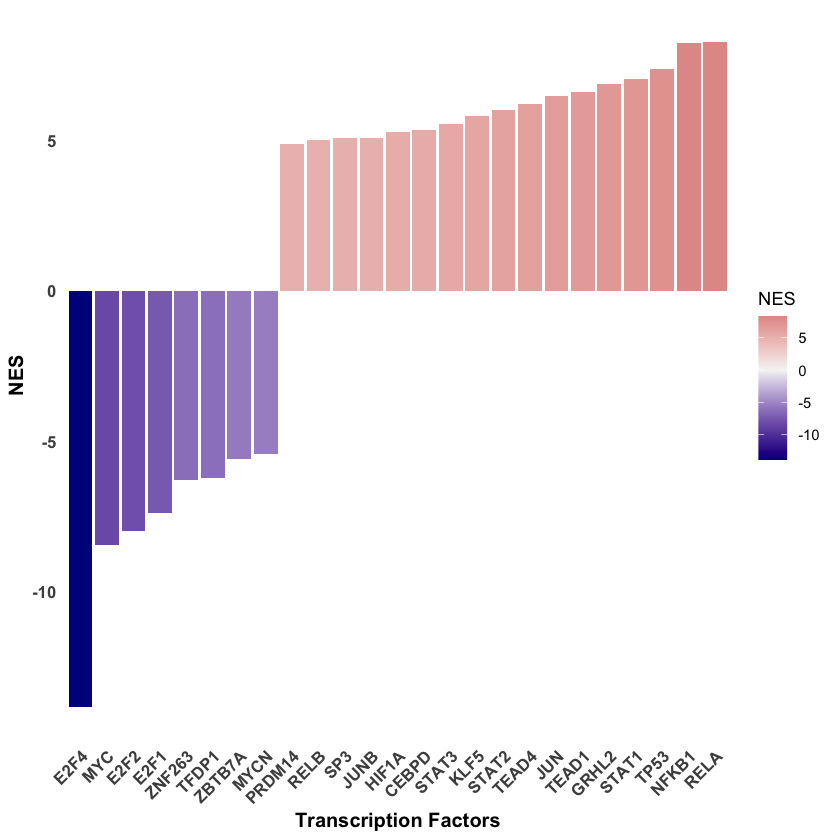

In [22]:
ggplot(tf_activities_stat_top25,aes(x = reorder(GeneID, NES), y = NES)) + 
    geom_bar(aes(fill = NES), stat = "identity") +
    scale_fill_gradient2(low = "darkblue", high = "indianred", 
        mid = "whitesmoke", midpoint = 0) + 
    theme_minimal() +
    theme(axis.title = element_text(face = "bold", size = 12),
        axis.text.x = 
            element_text(angle = 45, hjust = 1, size =10, face= "bold"),
        axis.text.y = element_text(size =10, face= "bold"),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
    xlab("Transcription Factors")

In [23]:
targets_STAT2<- regulons$target[regulons$tf == "NFKB1"]


In [24]:
targets_STAT2

[1] "A2M"       "ABCB1"     "ADORA1"    "AGER"      "AGT"       "AKT1"     
  [7] "ALOX5AP"   "AMH"       "AR"        "ATF3"      "B2M"       "BCL2"     
 [13] "BCL2A1"    "BCL2L1"    "BCL3"      "BIRC2"     "BIRC3"     "BIRC5"    
 [19] "BRCA1"     "BRCA2"     "BST1"      "CCL11"     "CCL2"      "CCL22"    
 [25] "CCL3"      "CCL4"      "CCL5"      "CCND1"     "CCND2"     "CCR7"     
 [31] "CD40"      "CD40LG"    "CD58"      "CD69"      "CD74"      "CD80"     
 [37] "CD83"      "CD86"      "CDK4"      "CFLAR"     "CFTR"      "COL1A1"   
 [43] "COL1A2"    "CR2"       "CRMP1"     "CRP"       "CSF1"      "CSF2"     
 [49] "CSNK2A1"   "CTCF"      "CTSB"      "CXCL1"     "CXCL10"    "CXCL2"    
 [55] "CXCL3"     "CXCL5"     "CXCL8"     "CYP19A1"   "CYP27B1"   "DEFB4A"   
 [61] "EBI3"      "EDN1"      "EGFR"      "ELF3"      "F3"        "F8"       
 [67] "FAS"       "FASLG"     "FBP1"      "FCGRT"     "FN1"       "GADD45A"  
 [73] "GADD45G"   "GATA3"     "GDNF"      "GSTP1"     "HIF1A"     "HLA-F"    
 [79] "HMOX1"     "HSD11B2"   "ICAM1"     "IER3"      "IFNA1"     "IFNB1"    
 [85] "IFNG"      "IL10"      "IL12A"     "IL12B"     "IL17C"     "IL18"     
 [91] "IL1A"      "IL1B"      "IL1RN"     "IL2"       "IL23A"     "IL2RA"    
 [97] "IL4"       "IL5"       "IL6"       "IRF1"      "IRF4"      "IRF7"     
[103] "JUNB"      "KLK3"      "LPL"       "LTA"       "MADCAM1"   "MAT2A"    
[109] "MICA"      "MMP13"     "MMP14"     "MMP2"      "MMP3"      "MMP9"     
[115] "MYB"       "MYC"       "NFKBIA"    "NOD2"      "NOLC1"     "NOS1"     
[121] "NOS2"      "NOS3"      "NQO1"      "PDE7A"     "PDGFB"     "PIGR"     
[127] "PLAU"      "PLAUR"     "PTAFR"     "PTGS2"     "PTHLH"     "PTPN13"   
[133] "RIPK2"     "RRM2B"     "SAA2"      "SELE"      "SERPINA3"  "SERPINB1" 
[139] "SERPINE1"  "SOCS3"     "SOD2"      "TBX21"     "TFF3"      "TFPI2"    
[145] "THBD"      "TIMP1"     "TLR2"      "TNC"       "TNF"       "TNFAIP3"  
[151] "TNFRSF10A" "TNFRSF10B" "TNFSF10"   "TP53"      "TRAF1"     "TRAF2"    
[157] "VCAM1"     "VEGFA"     "VEGFC"     "VEGFD"     "VIM"       "VWF"      
[163] "WT1"       "XIAP"

In [26]:
tf_activities_CARNIVALinput<- tf_activities_stat %>%
    as.data.frame() %>% 
    tibble::rownames_to_column(var = "TF") 
write_csv(tf_activities_CARNIVALinput, "TFActivity_CARNIVALinput.csv")

In [27]:
tf_activities_counts <- 
    dorothea::run_viper(Normalised_counts_matrix, regulons,
    options =  list(minsize = 5, eset.filter = FALSE, 
    cores = 1, verbose = FALSE, method = c("scale")))

In [28]:
tf_activities_counts_filter <- tf_activities_counts %>% 
    as.data.frame() %>% 
    rownames_to_column(var = "GeneID") %>%
    dplyr::filter(GeneID %in% tf_activities_stat_top25$GeneID) %>%
    column_to_rownames(var = "GeneID") %>%
    as.matrix()
tf_activities_vector <- as.vector(tf_activities_counts_filter)

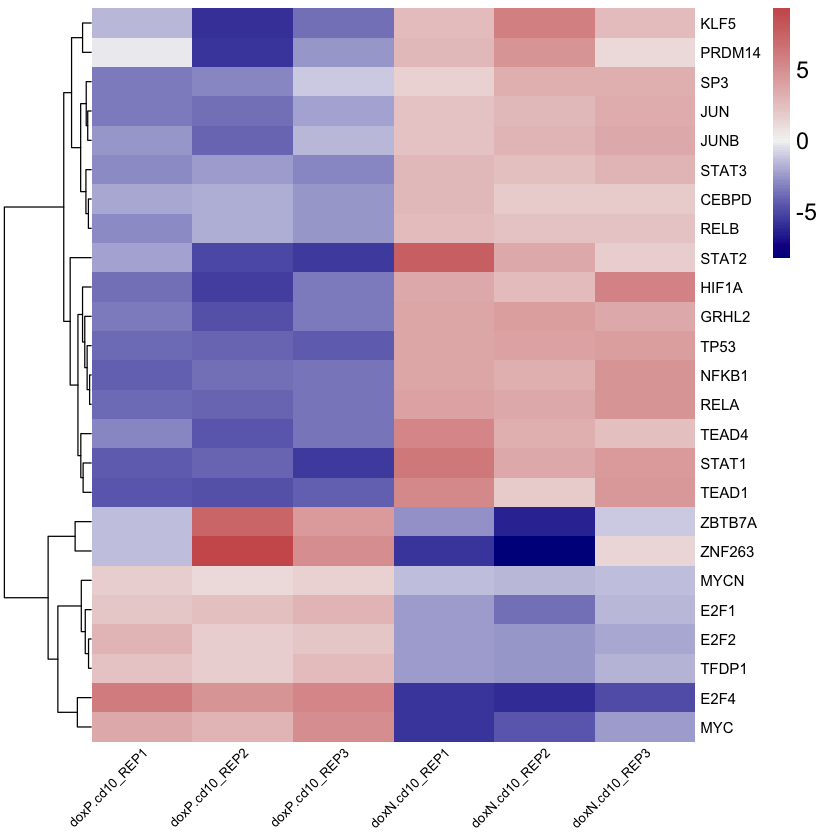

In [29]:
paletteLength <- 100
myColor <- 
    colorRampPalette(c("darkblue", "whitesmoke","indianred"))(paletteLength)

dorotheaBreaks <- c(seq(min(tf_activities_vector), 0, 
    length.out=ceiling(paletteLength/2) + 1),
    seq(max(tf_activities_vector)/paletteLength, 
    max(tf_activities_vector), 
    length.out=floor(paletteLength/2)))
dorothea_hmap <- pheatmap(tf_activities_counts_filter,
    fontsize=14, fontsize_row = 9, fontsize_col = 8, 
    color=myColor, breaks = dorotheaBreaks, angle_col = 45,
    treeheight_col = 0,  border_color = NA,cluster_cols=F)

In [30]:
pdf("Dorothea analysis doxN.CD10.versus.doxP.CD10.pdf", width = 8, height = 8)
print(dorothea_hmap)
dev.off()

pdf 
  2